In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#top 5 host_id price averages
df.groupby(["host_id", "host_name"])['price'].mean().sort_values(ascending=False).head()

host_id   host_name
20582832  Kathrine     10000.0
5143901   Erin         10000.0
72390391  Jelena       10000.0
4382127   Matt          9999.0
3906464   Amy           9999.0
Name: price, dtype: float64

In [5]:
maxPrice = df['price'].max()
maxPrice

10000

In [6]:
highestRents = df[df['price'] == maxPrice]
highestRents

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


In [7]:
highestRents['host_id'].values

array([20582832,  5143901, 72390391])

<AxesSubplot:>

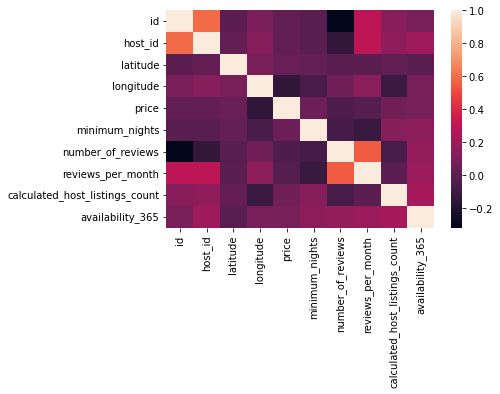

In [8]:
sns.heatmap(df.corr())

In [9]:
from scipy import stats

In [10]:
twentyFifth = df['price'].quantile(.25)
seventyFifth = df['price'].quantile(.75)
inner = seventyFifth - twentyFifth;
upperOutliers = inner * 1.5 + seventyFifth;
df[df['price'] > upperOutliers]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe72a1b9880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe72a1b9ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe72a1b9430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe72a74d640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe72a74d9d0>],
 'means': []}

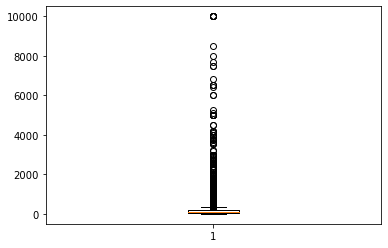

In [11]:
#boxplot before minimum nights higher than 14 removed

plt.boxplot(df['price'])

In [12]:
drop_high_minimum_nights = df[df['minimum_nights'] > 14]
df.drop(drop_high_minimum_nights.index, inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe72aeb51f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe72aeb5910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe72aea4e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe72aec3070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe72aec3400>],
 'means': []}

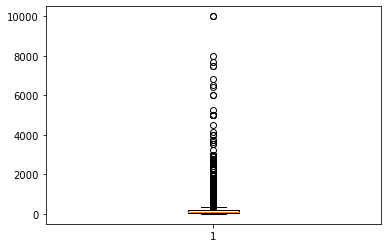

In [13]:
#boxplot before zeroes removed

plt.boxplot(df['price'])

In [14]:
zeroPricing = df[df['price'] == 0]
df.drop(zeroPricing.index, inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe72aed3fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe72aee2700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe72aed3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe72aee2e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe72aeed1f0>],
 'means': []}

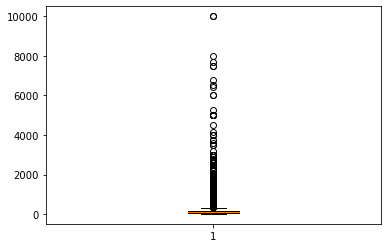

In [15]:
#boxplot before outliers removal

plt.boxplot(df['price'])

In [16]:
df.sort_values('price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23256,18835820,"Quiet, Cozy UES Studio Near the Subway",52777892,Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,2018-10-22,0.39,1,0
33225,26235873,Voted #1 Airbnb In NYC,197169969,Maria,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10,2,22,2019-07-06,1.76,1,332
31066,24114389,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875,Salim,Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,2018-04-23,0.13,1,0
35386,28071998,Cozy room in a three-bedroom House,47516406,Arthur,Queens,Woodhaven,40.69139,-73.86086,Private room,10,7,4,2018-10-08,0.41,2,180


In [17]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             88.721848
Brooklyn         125.093547
Manhattan        191.545731
Queens            99.759853
Staten Island    116.461756
Name: price, dtype: float64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

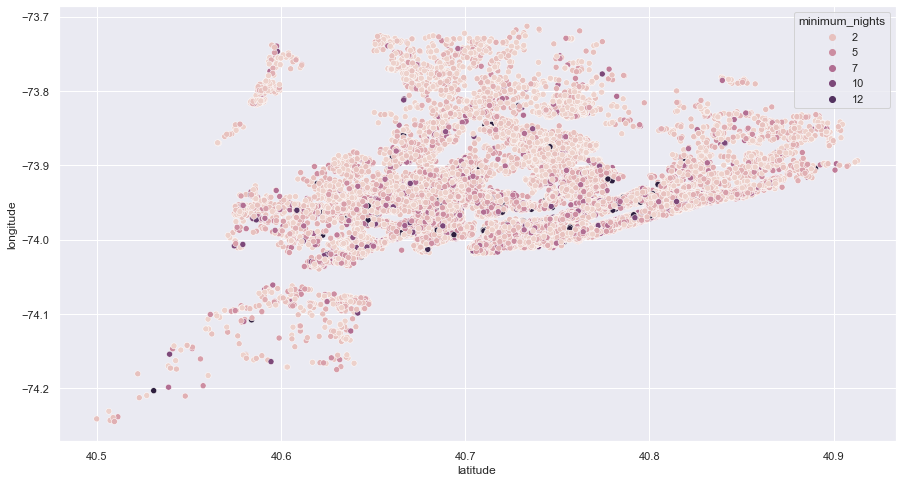

In [18]:
#areas with highest minimum_nights available before outliers removal

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=df, x='latitude', y='longitude', hue='minimum_nights')

In [19]:
twentyFifth = df['price'].quantile(.25)
seventyFifth = df['price'].quantile(.75)
inner = seventyFifth - twentyFifth;
upperOutliers = inner * 1.5 + seventyFifth;
outliers = df[df['price'] > upperOutliers]
df.drop(outliers.index, inplace=True)

In [20]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

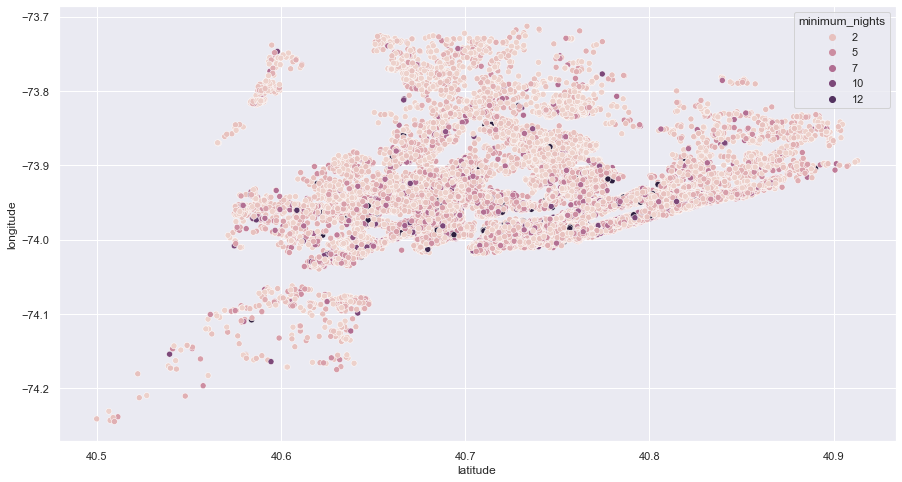

In [21]:
#areas with highest minimum_nights available after outliers removal

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=df, x='latitude', y='longitude', hue='minimum_nights')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe72b287e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe72b27a5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe72b287af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe72b27ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe72b32b100>],
 'means': []}

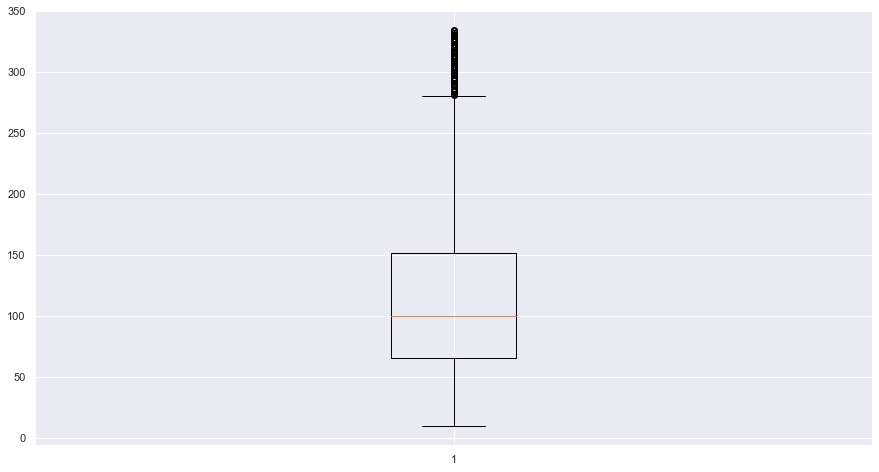

In [22]:
plt.boxplot(df['price'])

In [23]:
df.groupby('neighbourhood_group')['price'].mean().mean()

101.74970445482536

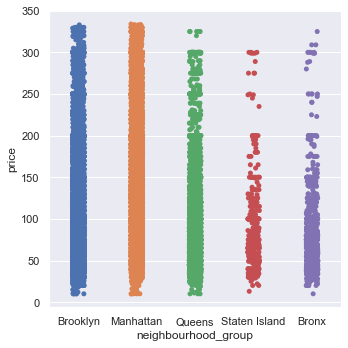

In [24]:
sns.catplot(x = 'neighbourhood_group', y='price', data = df )

In [32]:
df.groupby('host_id')['price'].mean().sort_values(ascending=False).head()

host_id
412783       334.0
29065752     333.0
269146714    333.0
62031986     333.0
224001464    333.0
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

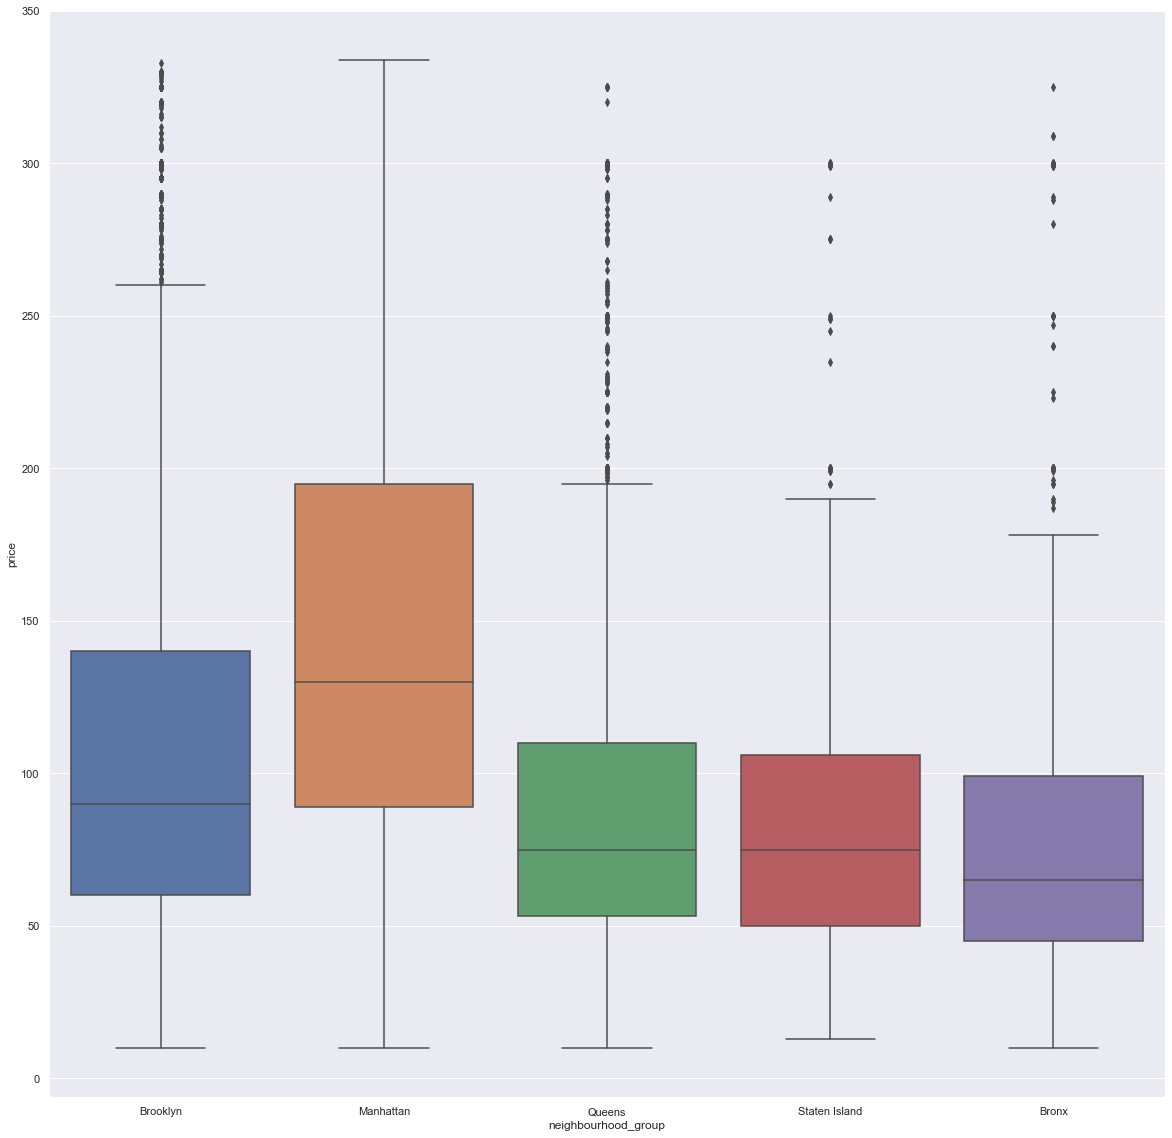

In [43]:
#boxplot of each boroughs price
sns.set(rc = {'figure.figsize':(20,20)})
sns.boxplot(data=df, y="price", x="neighbourhood_group")

# Findings
- There is an abnormal amount of outliers in the price category
    - I am going to attempt to trim down the data to get it more normalized
    - I removed prices that were listed as 0, which did not do much to change the boxplot
- Some airbnbs have an abnormal amount of minimum days to rent
    - which i ended up removing any listings with larger than 14 days, to retrieve only the short term rentals
    - This did nothing in attempting to remove outliers in the price category
- Manhattan has the highest average price of all 5 boroughts, with Staten Island coming at number 3
- I removed about 3000 outliers, and got a normal boxplot from the normalized data
    - After normalizing the data, Queens squeaked by staten island in average price cost, with Manhattan still in first.
- Top 5 hosts with highest average pricesfor their listings